In [1]:
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
df = pd.read_csv('dataset_with_has_delay.csv')

In [3]:
X = df.drop(columns=['has_delay', 'Min Delay', 'Min Gap'])
y = df['has_delay']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
y_pred = model.predict(X_test)

In [7]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1658   79]
 [ 355  126]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1737
           1       0.61      0.26      0.37       481

    accuracy                           0.80      2218
   macro avg       0.72      0.61      0.63      2218
weighted avg       0.78      0.80      0.77      2218



In [8]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-Validation Scores: {scores}")
print(f"Mean Accuracy: {scores.mean():.4f}")

Cross-Validation Scores: [0.79531109 0.7992783  0.79657194 0.79161028 0.21154714]
Mean Accuracy: 0.6789


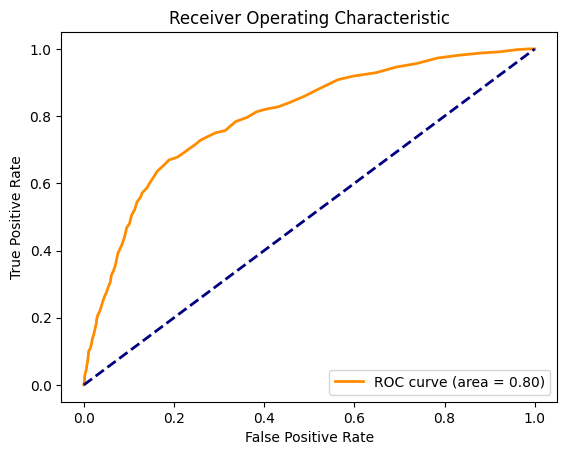

In [9]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Distribución de clases (%):
has_delay
0    79.514703
1    20.485297
Name: proportion, dtype: float64


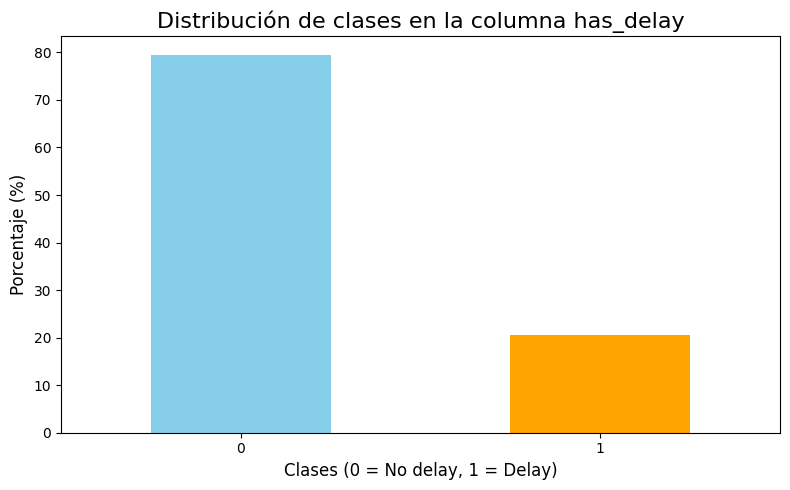

In [10]:
class_counts = df['has_delay'].value_counts(normalize=True) * 100
print("Distribución de clases (%):")
print(class_counts)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
class_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribución de clases en la columna has_delay', fontsize=16)
plt.xlabel('Clases (0 = No delay, 1 = Delay)', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()